In [13]:
import pandas as pd
df = pd.read_excel("C:/Users/Dc/Desktop/superstore.xlsx")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
# For showing info checking Size
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
# Time Based Matrices
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Total sales by year
sales_by_year = df.groupby(df["Order Date"].dt.year)["Sales"].sum()

# Monthly sales trend
monthly_sales = df.groupby(df["Order Date"].dt.month)["Sales"].sum()

print(sales_by_year, monthly_sales)


Order Date
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64 Order Date
1     161083.5874
2     132721.3594
3     220064.6460
4     147031.2641
5     166420.3167
6     144883.4973
7     161227.1045
8     209964.3679
9     248989.3031
10    184356.3342
11    271693.7525
12    248765.3272
Name: Sales, dtype: float64


In [16]:
#Finding the Top Products and categories
top_categories = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)


In [17]:
#Checking Region Performance

region_performance = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)


In [18]:
# Profit Analysis 
profit_by_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
average_profit_margin = (df["Profit"] / df["Sales"]).mean() * 100


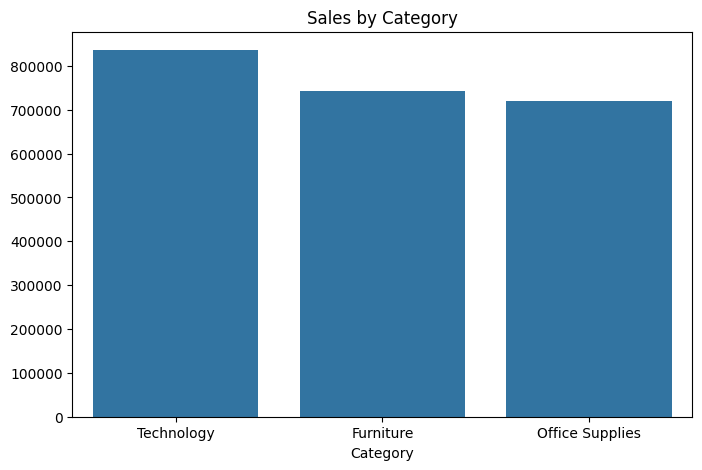

In [19]:
#Sales By Category

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Sales by Category")
plt.show()


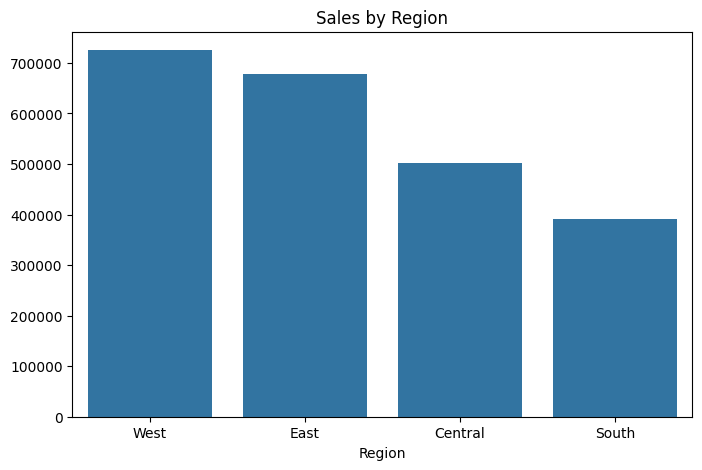

In [20]:
#Region Sales Comparison

plt.figure(figsize=(8,5))
sns.barplot(x=region_performance.index, y=region_performance.values)
plt.title("Sales by Region")
plt.show()


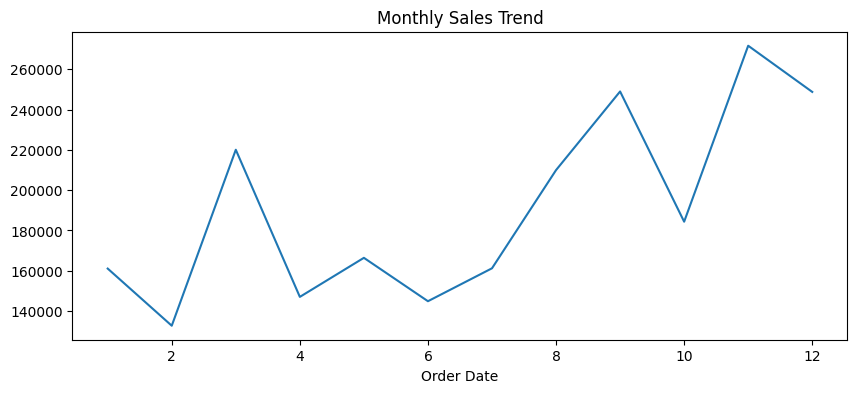

In [21]:
#Monthly Trends 

plt.figure(figsize=(10,4))
monthly_sales.plot(kind="line")
plt.title("Monthly Sales Trend")
plt.show()


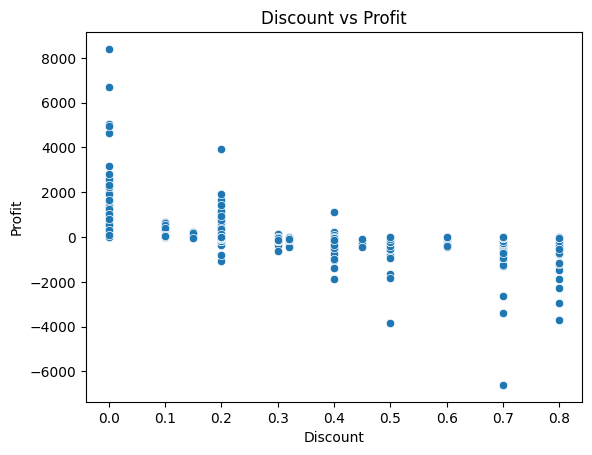

In [22]:
# Discount Vs Profit Anlysis


plt.figure()
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit")
plt.show()


In [23]:
#Loss Making Products 

loss_products = df[df["Profit"] < 0]
loss_products.groupby("Sub-Category")["Profit"].sum().sort_values()


Sub-Category
Binders       -38510.4964
Tables        -32412.1483
Machines      -30118.6682
Bookcases     -12152.2060
Chairs         -9880.8413
Appliances     -8629.6412
Phones         -7530.6235
Furnishings    -6490.9134
Storage        -6426.3038
Supplies       -3015.6219
Accessories     -930.6265
Fasteners        -33.1952
Name: Profit, dtype: float64

In [24]:
#Finding the high value Customers
customer_sales = df.groupby("Customer ID")["Sales"].sum().sort_values(ascending=False)

top_customers = customer_sales.head(10)


In [25]:
#Profit Margin 

df["Profit_Margin"] = (df["Profit"] / df["Sales"]) * 100

df["Profit_Margin"].mean()


np.float64(12.031392972104458)

In [26]:
#Shipping Mode Analysis
shipping_analysis = df.groupby("Ship Mode")["Profit"].sum()
